In [72]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import pandas as pd
import bug_utils as bug
import importlib
import matplotlib.pyplot as plt
importlib.reload(bug)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import normalize

In [19]:
# run1 = {"data_sampler": "ordered", "n_samples": 500, "n_trains":[20, 50, 200], "n_labels": [100], 
#         "models":["nn"], "fc_nn_sizes" : [280, 230], "train_features": ["A_x","A_y","B_x","B_y","C_x","C_y",
#                                                                         "dist_A_left","dist_A_top",
#                                                                         "dist_A_right","dist_A_bottom",
#                                                                         "dist_A_center","dist_B_left",
#                                                                         "dist_B_top","dist_B_right",
#                                                                         "dist_B_bottom","dist_B_center"], 
#         "label_features": ['C_x', 'C_y']}
# b = bug.multi_run(run1, debug=True)

In [52]:
train_all, label_all = bug.split_all_videos_random(500, 20, 100, 
                                        ["A_x","A_y","B_x","B_y","C_x","C_y","dist_A_left","dist_A_top",
                                         "dist_A_right","dist_A_bottom","dist_A_center","dist_B_left",
                                         "dist_B_top","dist_B_right","dist_B_bottom","dist_B_center"], 
                                         ["C_x","C_y"], 
                                         debug=False)
# train_all = normalize(train_all)
X_train, X_test, y_train, y_test = train_test_split(train_all, label_all, test_size=0.2)


In [53]:
cost, sess, X, hypothesis = bug.nn_run([280, 240], X_train, X_test, y_train, y_test, debug=True)


========== step  0
train cost:  335.659
test cost:  342.303
========== step  200
train cost:  167.474
test cost:  178.902
========== step  400
train cost:  160.123
test cost:  180.419
========== step  600
train cost:  154.943
test cost:  181.079
========== step  800
train cost:  120.375
test cost:  155.147
========== step  1000
train cost:  115.004
test cost:  157.821
========== step  1200
train cost:  84.5793
test cost:  140.156
========== step  1400
train cost:  67.4073
test cost:  136.749
========== step  1600
train cost:  64.6477
test cost:  141.016
========== step  1800
train cost:  59.792
test cost:  143.415
========== step  2000
train cost:  57.9092
test cost:  146.884
========== step  2200
train cost:  54.0235
test cost:  143.42
========== step  2400
train cost:  50.0595
test cost:  145.843
========== step  2600
train cost:  50.4666
test cost:  150.318
========== step  2800
train cost:  48.411
test cost:  149.433
========== step  3000
train cost:  45.1934
test cost:  150.246
==

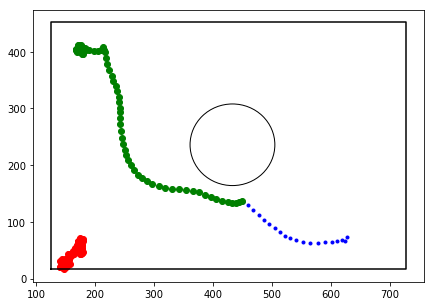

In [73]:
train_one, label_one = bug.split_all_videos_random(1, 20, 100, 
                                        ["A_x","A_y","B_x","B_y","C_x","C_y","dist_A_left","dist_A_top",
                                         "dist_A_right","dist_A_bottom","dist_A_center","dist_B_left",
                                         "dist_B_top","dist_B_right","dist_B_bottom","dist_B_center"], 
                                         ["C_x","C_y"], 
                                         debug=False)
preds = sess.run(hypothesis, feed_dict={X: train_one})
train_one_pair = bug.reshape_df_for_show(train_one)
label_one_pair = bug.reshape_df_for_show(label_one)
preds_pair = bug.reshape_np_for_show(preds)
bug.show_pred(train_one_pair, label_one_pair, reshaped.T)

In [66]:
# print(train_one.shape)
# print(train_one)
# print(train_one_pair.shape)
# print(train_one_pair)
# xs = train_one.iloc[0].loc[:, 'C_x'].values
# ys = train_one.iloc[0].loc[:, 'C_y'].values
# print(xs)
# print(ys)
# print(preds)
# print(preds_pairs)
print(preds.shape)
print(preds)
reshaped = (preds.reshape(int(preds.shape[1]/2), 2))
print(reshaped.T)

(1, 200)
[[ 175.00643921   50.56248093  175.33474731   52.1624527   176.99441528
    51.80986404  176.06124878   49.70049667  177.48083496   53.19006729
   176.42353821   49.0583992   177.3697052    49.99844742  178.9233551
    45.90215302  176.954422     47.36530304  177.97662354   46.34593964
   176.70582581   45.59134674  177.37283325   45.07352448  175.22740173
    46.17855453  176.35411072   43.67507935  174.80703735   43.91200638
   173.95440674   44.55911255  175.41584778   47.94009781  176.58528137
    47.39015198  172.27429199   50.74543762  174.64498901   48.2568512
   172.41796875   49.72290421  173.89399719   51.15745163  174.47799683
    59.80542755  177.97416687   58.3109169   172.93405151   56.92528534
   176.00785828   57.10780716  171.68759155   57.19594574  175.8704071
    60.46779251  175.11132812   64.9067688   178.66160583   66.54876709
   178.85203552   69.74376678  176.36863708   69.65493774  173.36961365
    71.12110138  173.06581116   65.26246643  175.75875854 

100.0


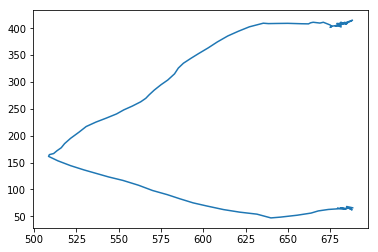

In [130]:
one_run = y_test.values[0]
print(one_run.shape[0]/2)
something =(y_test.values.reshape([int(one_run.shape[0]/2), 2]))
plt.plot(something[:,0], something[:,1])


100.0


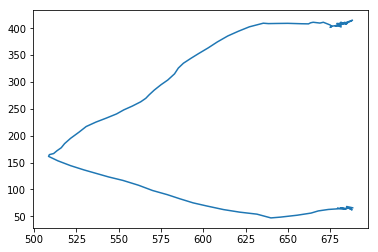

In [130]:
one_run = y_test.values[0]
print(one_run.shape[0]/2)
something =(y_test.values.reshape([int(one_run.shape[0]/2), 2]))
plt.plot(something[:,0], something[:,1])


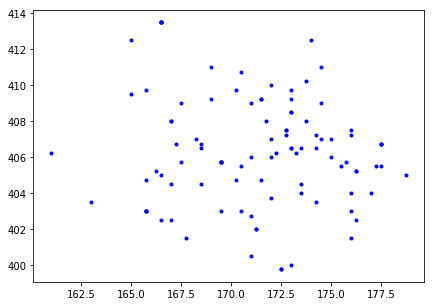

In [115]:
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(reshaped_one_run[:,0], reshaped_one_run[:,1], 'b.')

In [144]:
x = np.array([1,2,3])
print(x)

[1 2 3]
